In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

import xgboost 
from sklearn import set_config
set_config(transform_output="pandas")
pd.set_option('display.max_columns', 500)

In [2]:
from db.database_mysql import engine

film = pd.read_sql_query('''SELECT 
                              YEAR(date) AS year, 
                              MONTH(date) AS month, 
                              DAY(date) AS day, 
                              director, distributor, casting, duration, country, genre
                            FROM functionalities_filmscrap
                            -- LIMIT 1
                         ''', engine)



In [3]:
from joblib import load

pipe_transform = load('./modelisation/pipe_transform.pkl')
model = load('./modelisation/model.pkl')

f = pd.DataFrame.from_dict(dict(film))
film_transformed = pipe_transform.transform(f)

display(film_transformed[film_transformed.isna().any(axis=1)])
pred = model.predict(film_transformed)
pred

,year,month,day,director,distributor,casting,duration,country,genre,actor_combined_score,year_combined_score,season,country_combined_score,month_name,is_holiday,director_combined_score,distributor_combined_score
0,2024,4,24,"""fazeijf""",None,None,NaN,None,,0.375,0.472901,spring,0.0,april,1,0.25,0.5
1,2024,4,13,None,None,None,NaN,None,,0.375,0.472901,spring,0.0,april,0,0.25,0.5
2,2024,4,17,None,None,None,NaN,None,,0.375,0.472901,spring,0.0,april,0,0.25,0.5
72,2024,11,6,"""reda kateb""","[""pyramide productions""]","[""sara giraudeau"", ""aloise sauvage"", ""samir gu...",-1.0,None,,0.375,0.472901,autumn,0.0,novembre,0,0.25,0.5
78,2024,8,21,"""george huang""","[""europacorp""]","[""luke evans"", ""sung kang"", ""gwei lunmei""]",-1.0,None,action,0.375,0.472901,summer,0.0,august,1,0.25,0.5
80,2024,7,3,"""florentemilio siri""","[""france 2 cinema"", ""orange studio"", ""recifilms""]","[""roschdy zem"", ""laetitia eido"", ""jeanne michel""]",-1.0,None,action,0.375,0.472901,summer,0.0,july,0,0.75,0.5


ValueError: columns are missing: {'copies'}

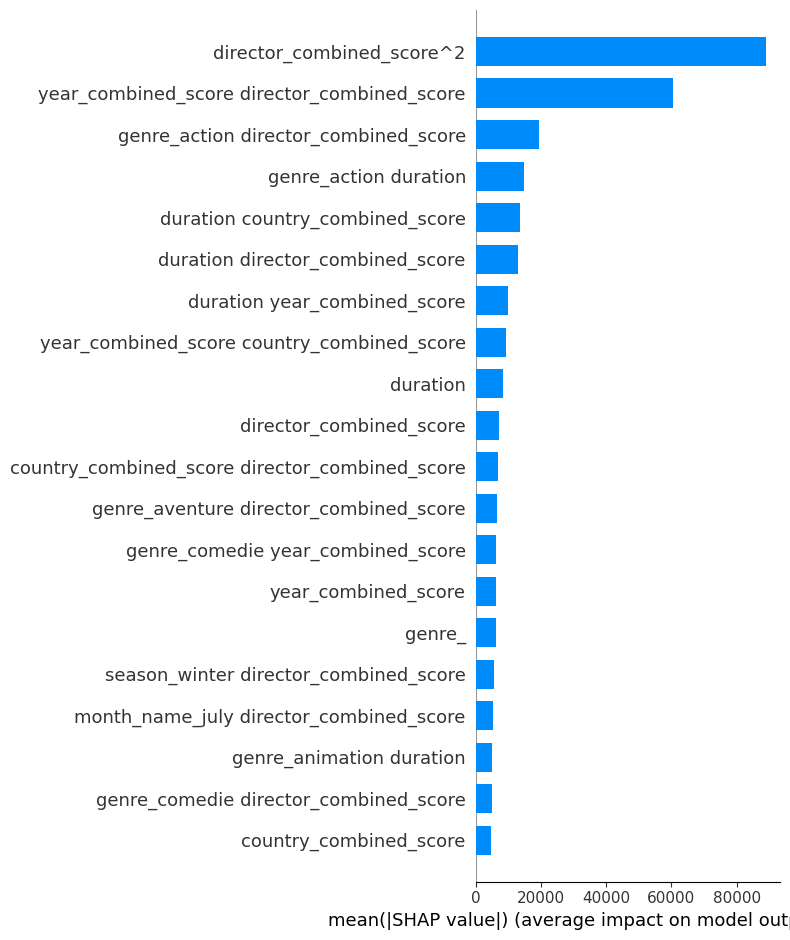

In [ ]:
import shap
shap.initjs()


# Fits the explainer
explainer = shap.TreeExplainer(model['model'])
observations = model['transform'].transform(film_transformed)
#display(observations)
shap_values = explainer.shap_values(observations)
shap_values_explainer = explainer(observations)
shap.summary_plot(shap_values, observations, plot_type="bar")



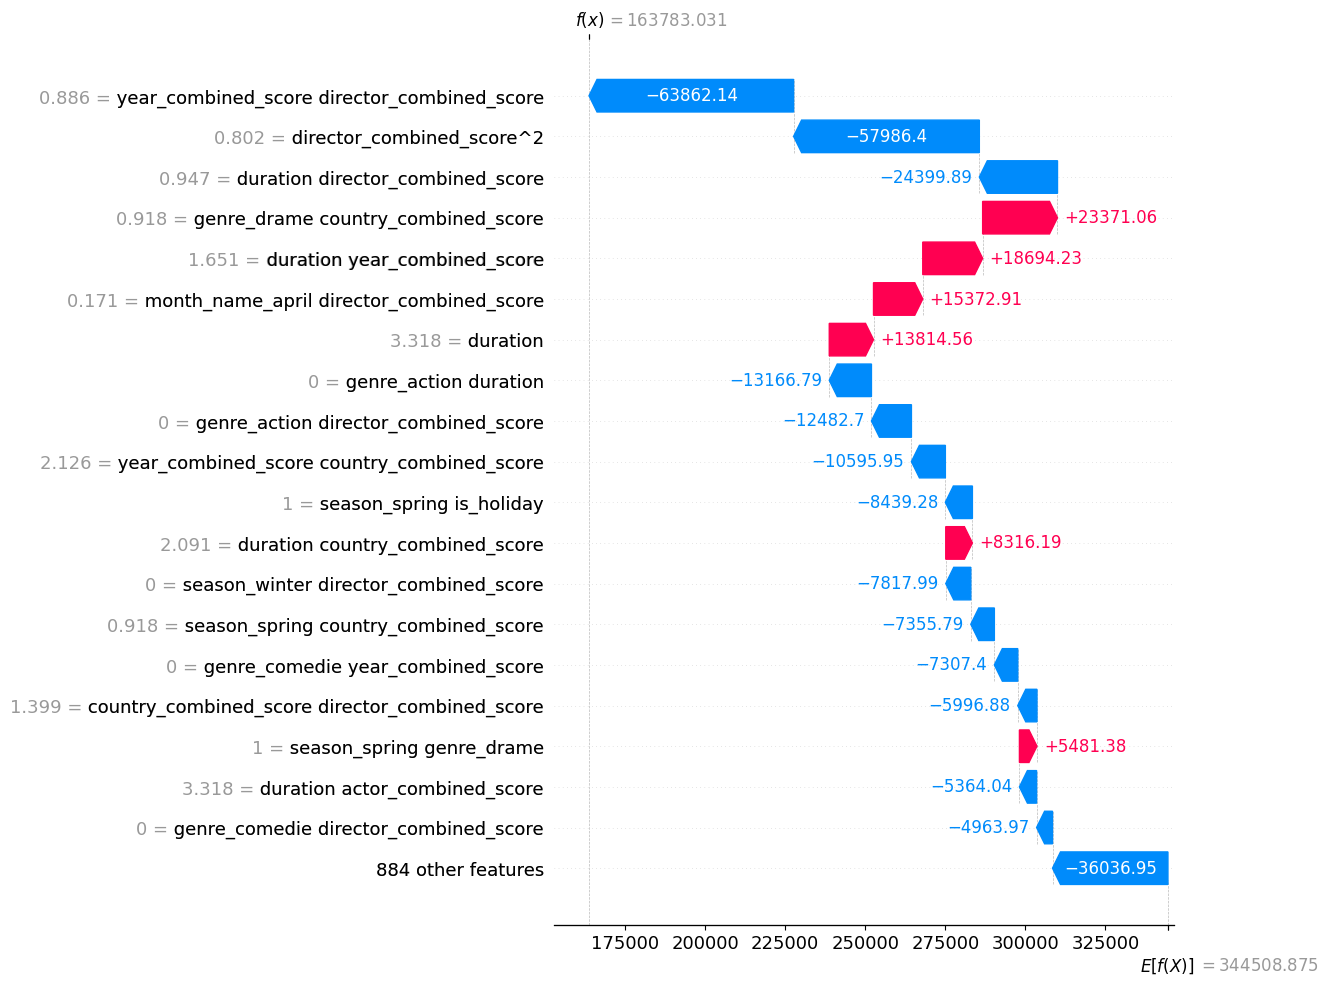

In [ ]:
shap.plots.waterfall(shap_values_explainer[0], max_display=20)

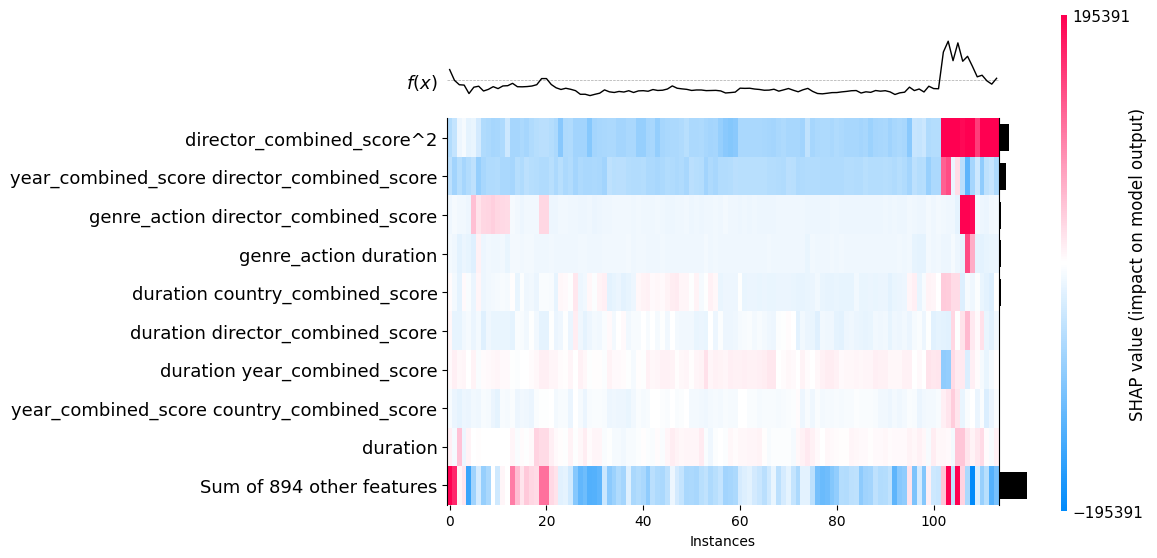

In [ ]:
shap.plots.heatmap(shap_values_explainer)

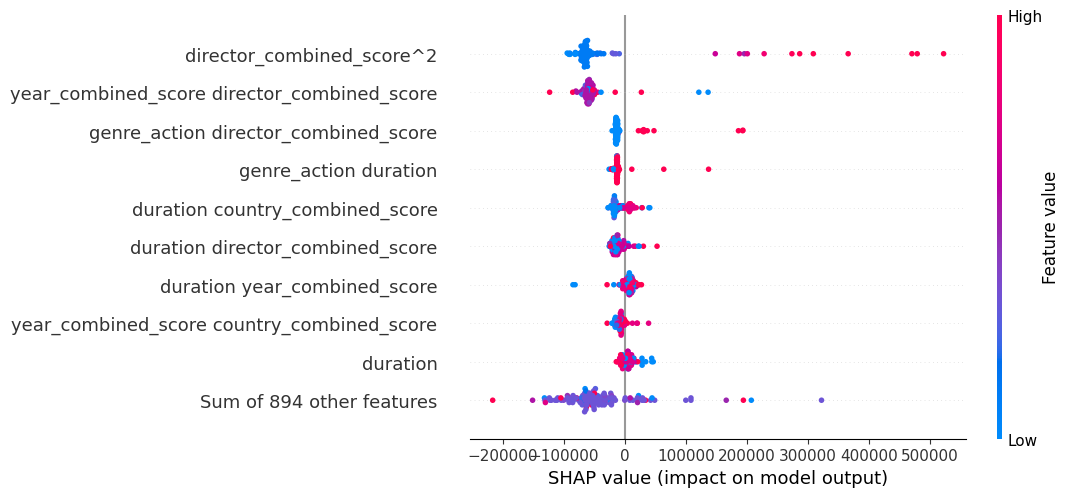

In [ ]:
shap.plots.beeswarm(shap_values_explainer)